### Load Libraries

In [1]:
import pandas as pd

### Load Data

In [3]:
#path = r"https://drive.google.com/uc?export=download&id=1xxDtrZKfuWQfl-6KA9XEd_eatitNPnkB" 
df = pd.read_csv("bng.csv") 

In [16]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [5]:
X = df.drop('price', axis=1)
y = df['price']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)


Shape of X =  (7120, 107)
Shape of y =  (7120,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5696, 107)
Shape of y_train =  (5696,)
Shape of X_test =  (1424, 107)
Shape of y_test =  (1424,)


##Randome Forest Regression - ML Model Training

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
#n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
regressor = RandomForestRegressor(n_estimators=100, criterion='mse')  
regressor.fit(X_train, y_train)

C:\Users\EASY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse')

In [13]:
regressor.score(X_test, y_test)

0.8842623125608963

In [18]:
regressor_100 = RandomForestRegressor(n_estimators=500, criterion='mse')
regressor_100.fit(X_train, y_train)

C:\Users\EASY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=500)

In [20]:
regressor_100.score(X_test, y_test)

0.8891144609223158

In [25]:
print(X_test)
print(y_test)

      bath   balcony  total_sqft_int  bhk  price_per_sqft  \
2435   3.0  1.584376          1700.0    3     4705.882353   
3113   2.0  2.000000          1016.0    2     3937.007874   
426    4.0  2.000000          1950.0    3     6153.846154   
1124   2.0  1.000000          1350.0    2     5851.851852   
1161   2.0  1.000000           850.0    2     5294.117647   
...    ...       ...             ...  ...             ...   
2078   2.0  1.000000          1090.0    2     2600.000000   
6855   3.0  1.000000          1585.0    3     5299.684543   
4381   1.0  2.000000           665.0    1     4812.030075   
3862   2.0  1.000000          1167.0    2     5398.457584   
43     2.0  0.000000          1566.0    2    11494.252874   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2435                              0                        1   
3113                              1                        0   
426                               1                        0   
1124       

In [26]:
y_pred = regressor.predict(X_test)
print(y_pred)
#print(y_test)

[ 79.6118   39.9508  119.85    ...  33.24825  63.3251  176.44   ]


In [27]:
y_pred = regressor_100.predict(X_test)
print(y_pred)
print(y_test)

[ 80.00308  39.92226 119.746   ...  33.37142  63.33018 175.946  ]
2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64


In [28]:
regressor_200= RandomForestRegressor(n_estimators=1000, criterion='mse')
regressor_200.fit(X_train, y_train)
regressor_200.score(X_test, y_test)

C:\Users\EASY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


0.89200348464665

In [30]:
y_pred = regressor_200.predict(X_test)
print(y_pred)
print(y_test)

[ 79.675845  39.93666  119.823    ...  33.375895  63.32356  175.93    ]
2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64


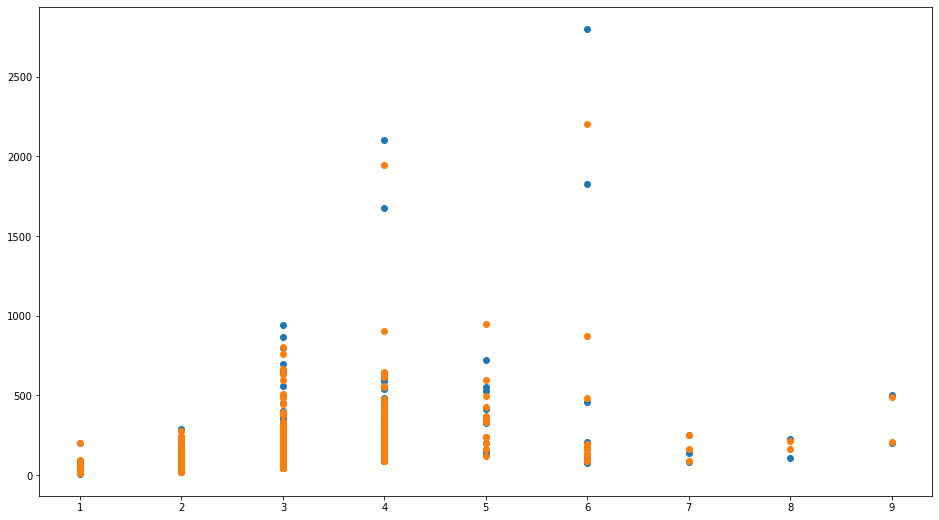

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.scatter(X_test['bhk'],y_test,label="original value ")
plt.scatter(X_test['bhk'],y_pred,label="predict value  ")
plt.show()